## Import python packages

In [386]:
# importing packages
import pandas as pd
import numpy as np
import seaborn as sns
# import matplotlib as mp
import matplotlib.pyplot as plt

print(f"pandas version: {pd.__version__}")
print(f"numpy version: {np.__version__}")
print(f"Seaborn version: {sns.__version__}")
# print(f"matplotlib version: {mp.__version__}")


print('All packages imported successfully!')

pandas version: 2.2.1
numpy version: 1.26.4
Seaborn version: 0.12.2
All packages imported successfully!


## Explore the dataset

In [387]:
# Original dataset was xlsx, convert to csv
df = pd.DataFrame(pd.read_excel("data/1688640705_hr_comma_sep.xlsx")) 
df.to_csv("data/hr_comma_sep.cvs", index=False)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [389]:
# Checking columns / rows dimensions & types
columns = list(df.columns)
dimensions = df.shape
print(
    f"Dimensions {dimensions} Data contains {dimensions[0]} rows and {dimensions[1]} columns"
)
print(f"Columns are {list(df.columns)}\n")
print(f"Dataset type: \n{df.dtypes}")

Dimensions (14999, 10) Data contains 14999 rows and 10 columns
Columns are ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']

Dataset type: 
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object


In [390]:
# Checking feature's counts
df.sales.value_counts()

sales
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [391]:
df.salary.value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

##  1. Perform data quality checks by checking for missing values, if any

In [392]:
# Check for null 
print("df.info() \n")
print(f"{df.info()} \n ")
print("Check for isna() \n")
print(f"{df.isna().sum()} \n")


df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None 
 
Check for isna() 

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left

In [393]:
print("Check for isnull() \n")
print(f"{df.isnull().sum()}")

Check for isnull() 

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


__Observation__:

- There are no empty rows in the dataset.

##  2. Understand what factors contributed most to employee turnover by EDA

### Draw a heatmap of the Correlation Matrix between all numerical features/columns in the data



In [394]:
# Calculating a Correlation Matrix with Pandas
# Remove sales & salary
df1 = df[columns[:-2]] 
matrix = df1.corr().round(2)
matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.00,0.11,-0.14,-0.02,-0.10,0.06,-0.39,0.03
last_evaluation,0.11,1.00,0.35,0.34,0.13,-0.01,0.01,-0.01
number_project,-0.14,0.35,1.00,0.42,0.20,-0.00,0.02,-0.01
average_montly_hours,-0.02,0.34,0.42,1.00,0.13,-0.01,0.07,-0.00
time_spend_company,-0.10,0.13,0.20,0.13,1.00,0.00,0.14,0.07
Work_accident,0.06,-0.01,-0.00,-0.01,0.00,1.00,-0.15,0.04
left,-0.39,0.01,0.02,0.07,0.14,-0.15,1.00,-0.06
promotion_last_5years,0.03,-0.01,-0.01,-0.00,0.07,0.04,-0.06,1.00


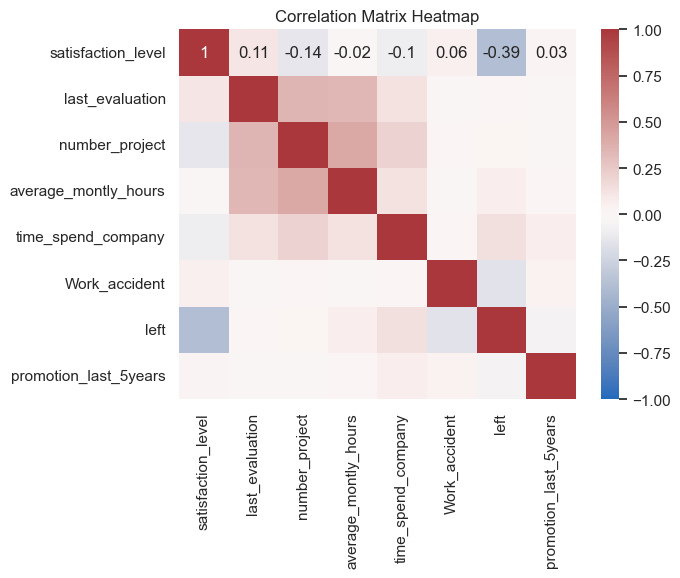

In [395]:
# Visualizing a Pandas Correlation Matrix Using Seaborn
# sns.heatmap(matrix, annot=True,cmap='vlag')
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.title('Correlation Matrix Heatmap')
plt.show()

/opt/anaconda3/envs/AIMLbootcamp/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


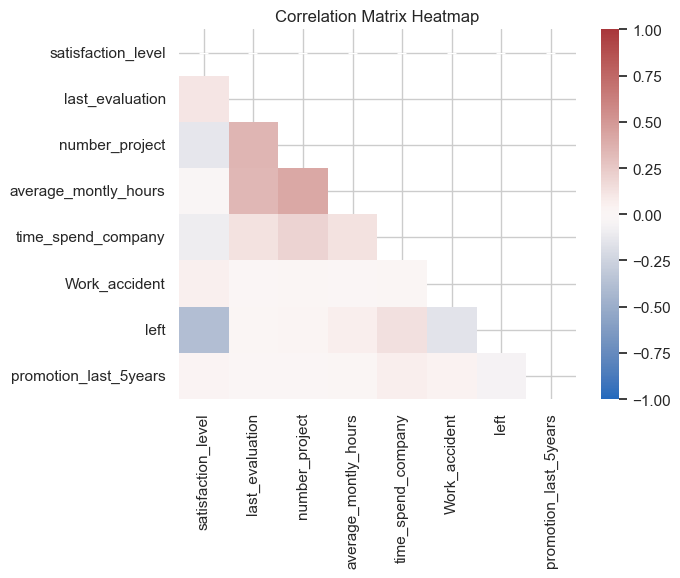

In [396]:
# show the bottom half of our visualization
# triu() function creates a triangle of a matrix.
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [397]:
# matrix = matrix[abs(matrix) >= 0.7]
# matrix
unstack_matrix = matrix.unstack()
unstack_matrix[unstack_matrix < 0]

satisfaction_level     number_project          -0.14
                       average_montly_hours    -0.02
                       time_spend_company      -0.10
                       left                    -0.39
last_evaluation        Work_accident           -0.01
                       promotion_last_5years   -0.01
number_project         satisfaction_level      -0.14
                       promotion_last_5years   -0.01
average_montly_hours   satisfaction_level      -0.02
                       Work_accident           -0.01
time_spend_company     satisfaction_level      -0.10
Work_accident          last_evaluation         -0.01
                       average_montly_hours    -0.01
                       left                    -0.15
left                   satisfaction_level      -0.39
                       Work_accident           -0.15
                       promotion_last_5years   -0.06
promotion_last_5years  last_evaluation         -0.01
                       number_project         

In [398]:
# Remove temporaly 
import warnings
# Displays each FutureWarning only once.
warnings.simplefilter("once", FutureWarning)

### Draw distributions plot of employees

In [399]:
# Set the esthetic style of the plots
sns.set_theme(style="whitegrid")

In [400]:
# Check for inf before drawing distributions
# ds = df1.isin([np.inf, -np.inf])
# print(ds) 
print("Printing the count of infinity values \n") 
count = np.isinf(df1).values.sum() 
print("DF contains " + str(count) + " infinite values") 
c_inf = np.isinf(df1['satisfaction_level']).values.sum() 
print("Feature 'satisfaction_level' contains " + str(c_inf) + " infinite values") 

df1 = df1.replace([np.inf, -np.inf], np.nan)
c_na = df1['satisfaction_level'].isna().sum()
print("Feature 'satisfaction_level' contains " + str(c_na) + " NaN values") 

df['satisfaction_level'].describe()

Printing the count of infinity values 

DF contains 0 infinite values
Feature 'satisfaction_level' contains 0 infinite values
Feature 'satisfaction_level' contains 0 NaN values


count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

In [482]:
# Separate categorical and numerical variables
cols = list(df.columns)
categorical_vars = cols[-2:] #['sales', 'salary']
numeric_vars = df.drop(columns=categorical_vars).columns
# Plot relationship between numerical features and turnover

# # Ensure the 'left' column is treated as a str variable
# df1['left'] = df1['left'].astype('str')

## It's failing in the feature `promotion_last_5years``

# for feature in numeric_vars:
#     plt.figure(figsize=(10, 5))
#     sns.boxplot(x='left', y=feature, data=df)
#     plt.title(f'Relationship between {feature} and Turnover')
#     plt.show()

# # Plot relationship between categorical features and turnover
# for feature in categorical_vars:
#     plt.figure(figsize=(10, 5))
#     sns.countplot(x=feature, hue='left', data=df)
#     plt.title(f'Relationship between {feature} and Turnover')
#     plt.show()

(array([1121.,  424.,  288.,  253.,  829., 1173.,  911., 1136., 1199.,
        1162., 1335., 1386., 1354., 1235., 1193.]),
 array([0.09      , 0.15066667, 0.21133333, 0.272     , 0.33266667,
        0.39333333, 0.454     , 0.51466667, 0.57533333, 0.636     ,
        0.69666667, 0.75733333, 0.818     , 0.87866667, 0.93933333,
        1.        ]),
 <BarContainer object of 15 artists>)

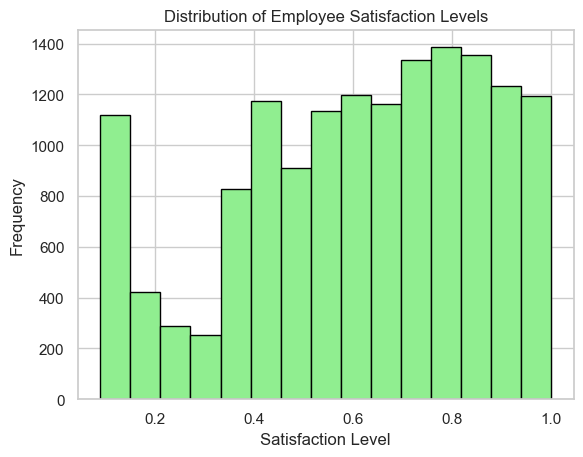

In [401]:
plt.title('Distribution of Employee Satisfaction Levels')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.hist(df1['satisfaction_level'], color='lightgreen', ec='black', bins=15)

We can observe that the satisfaction level of employes is high.


Adding  KDE overlay to highlight the underlying distribution pattern.
 
The following plots show the frequency distribution of:  

- Employee Satisfaction
- Employee Evaluation
- Employee Average Monthly Hours


/opt/anaconda3/envs/AIMLbootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


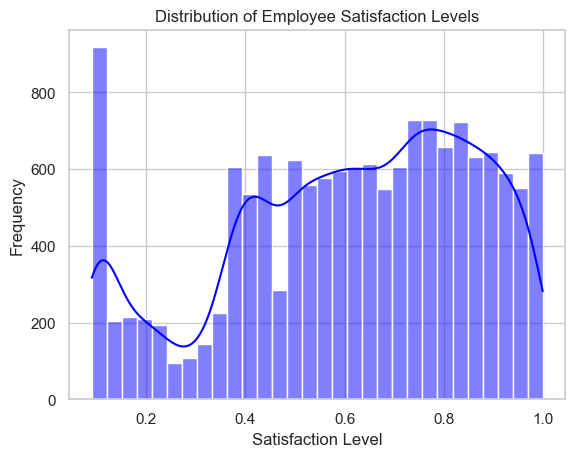

In [402]:
# Plot the distribution of employee satisfaction levels
# sns.displot(df['satisfaction_level'], kde=True, color='blue')
sns.histplot(df1['satisfaction_level'], kde=True, color='blue')
plt.title('Distribution of Employee Satisfaction Levels')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/envs/AIMLbootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


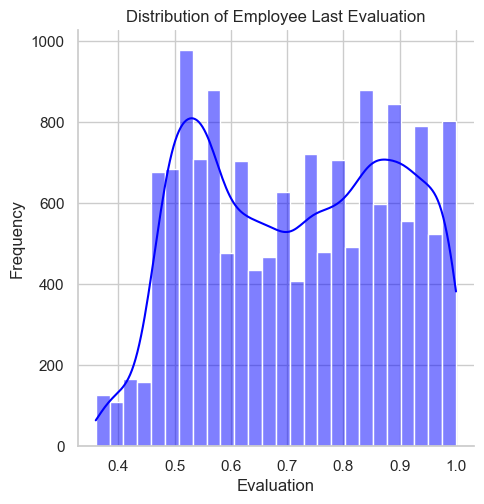

In [403]:
# Plot the distribution of employee evaluation
sns.displot(df1['last_evaluation'], kde=True, color='blue')
plt.title('Distribution of Employee Last Evaluation')
plt.xlabel('Evaluation')
plt.ylabel('Frequency')
plt.show()

__Observation__
 
It shows that there is a significant number of employees with evaluations around 0.5 and another group with evaluations around 0.9. Evaluations tend to cluster around those two values. 

/opt/anaconda3/envs/AIMLbootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


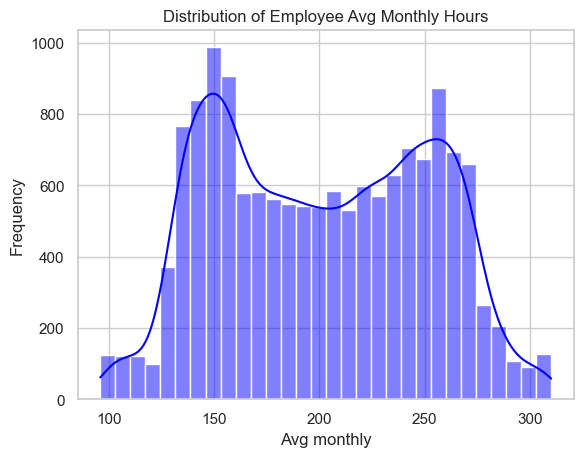

In [404]:
# Plot the distribution of Employee Average Monthly Hours
# sns.displot(df['average_montly_hours'], kde=True, color='green')
sns.histplot(df1['average_montly_hours'], kde=True, color='blue')
plt.title('Distribution of Employee Avg Monthly Hours')
plt.xlabel('Avg monthly')
plt.ylabel('Frequency')
plt.show()

__Observation__
 
It shows a significant number of employees with an avg betweem 150 and 250 hours per month.


__Draw the bar plot of the Employee Project Count of both employees who left and stayed__


/opt/anaconda3/envs/AIMLbootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/AIMLbootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/envs/AIMLbootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/envs/AIMLbootcamp/lib/python3.10/sit

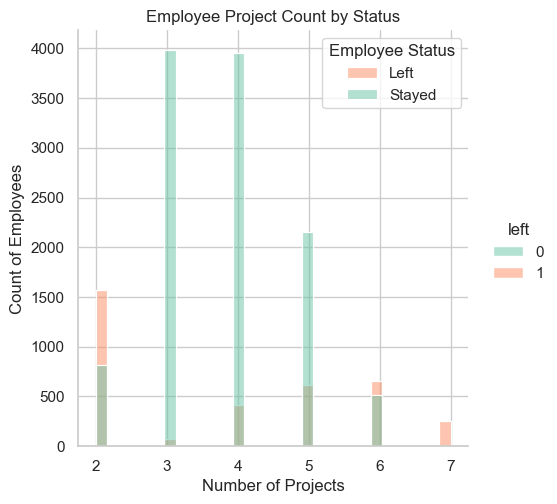

In [406]:
#  Draw the bar plot of the Employee Project Count of both employees who left and stayed in the organization 
#(use column number_project and hue column left), and give your inferences from the plot

# Create a bar plot for number of projects by employees' status (left or stayed)
sns.displot(x='number_project', hue='left', data=df1, palette='Set2')
plt.title('Employee Project Count by Status')
plt.xlabel('Number of Projects')
plt.ylabel('Count of Employees')
plt.legend(title='Employee Status', labels=['Left', 'Stayed'])
plt.show()

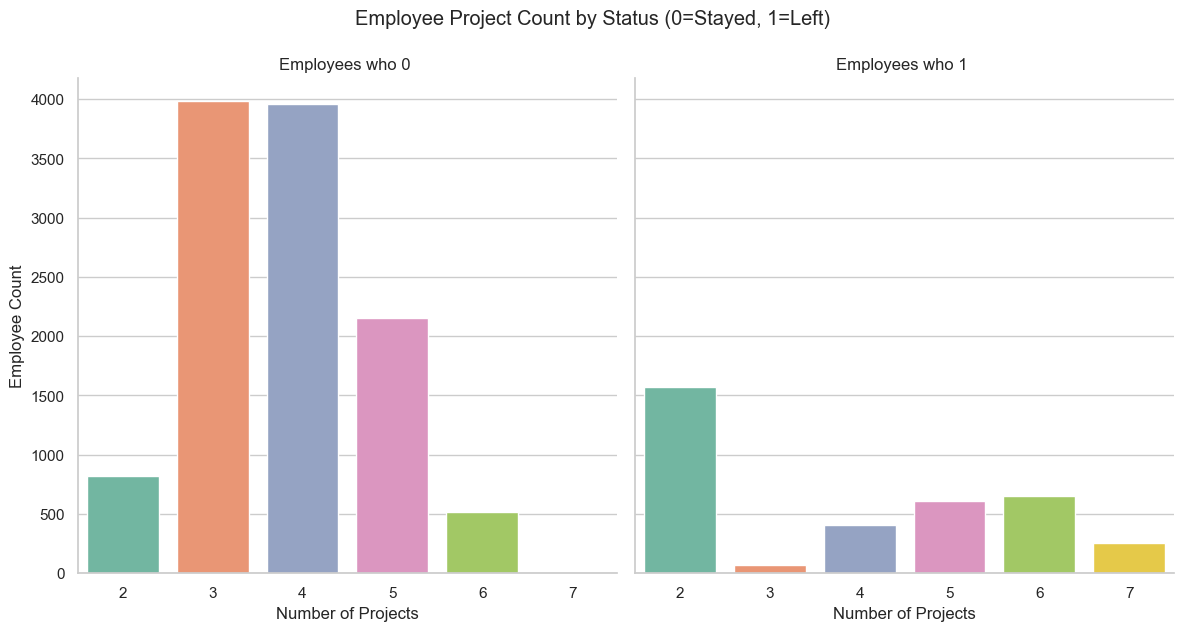

In [407]:
# Create a categorical plot (catplot) as a bar plot
g = sns.catplot(x='number_project', col='left', kind='count', data=df1, palette='Set2', height=6, aspect=1)
g.set_axis_labels('Number of Projects', 'Employee Count')
g.set_titles('Employees who {col_name} ')
g.figure.suptitle('Employee Project Count by Status (0=Stayed, 1=Left)', y=1.05)  # Adjust the main title and its position
plt.show()

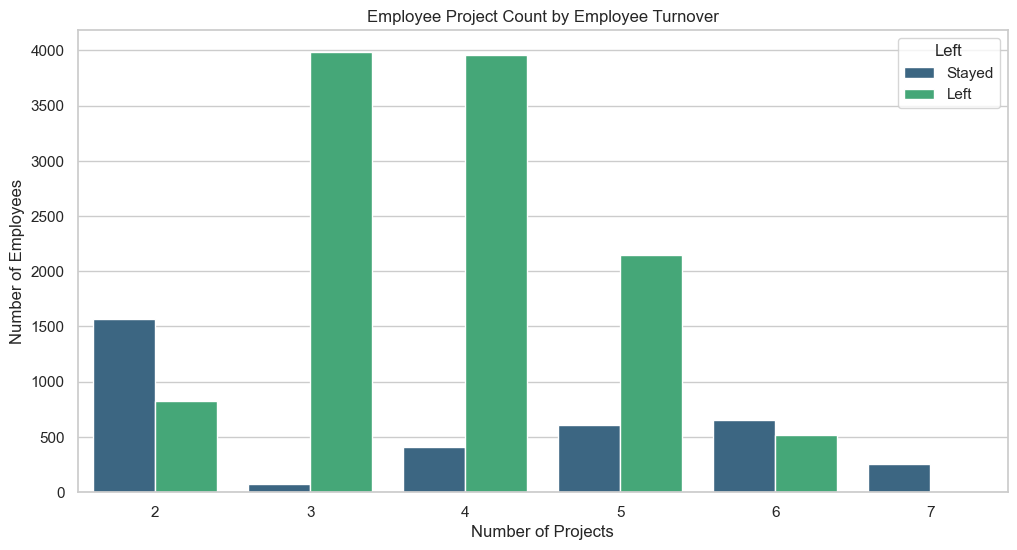

In [408]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the 'left' column is treated as a str variable
df1['left'] = df1['left'].astype('str')

# Plot the bar plot of Employee Project Count with respect to employee turnover
plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x='number_project', hue='left', palette='viridis')
plt.title('Employee Project Count by Employee Turnover')
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.legend(title='Left', loc='upper right', labels=['Stayed', 'Left'])
plt.show()



__Observations__

Inferences from the plot:


It allow us to observe how the distribution of projects is spread among those who left the organization compared to those who stayed.

Employees handling medium number of projects (between 3 and 5 projects) seem to have a lower turnover (stayed), indicating ideal workload for employees.

It seems that the extreme have higher turnover. Employees handling fewer projects (2), or handling too many projects (between 5 and 7) have higher turnover.

## 3. Perform clustering of employees who left based on their satisfaction and evaluation

In [409]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

/var/folders/lk/rsf38rvj3qj0tpdcgt79nwkm0000gn/T/ipykernel_96139/983680119.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_df['cluster'] = kmeans.fit_predict(data_scaled)


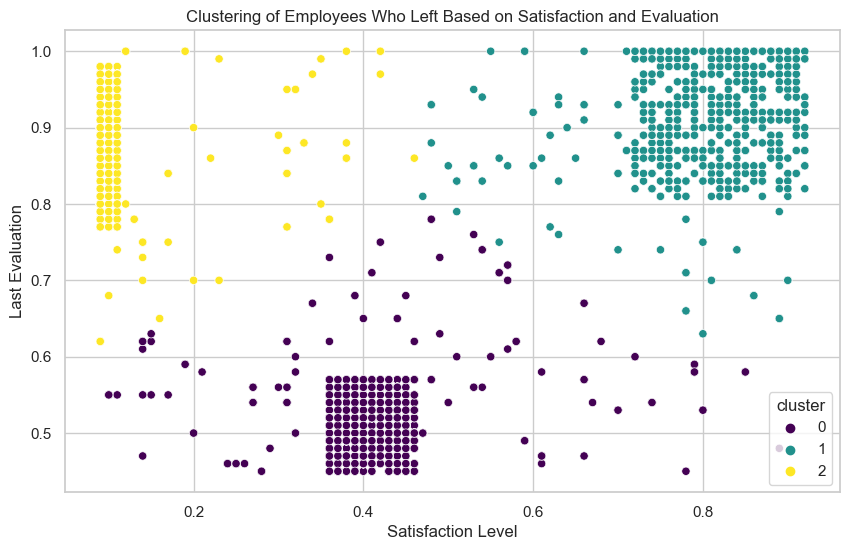

In [410]:
# Filter the dataset for employees who left
left_df = df[df['left'] == 1]
# Select relevant columns
data = left_df.loc[:, ('satisfaction_level', 'last_evaluation')]
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
left_df['cluster'] = kmeans.fit_predict(data_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='cluster', data=left_df, palette='viridis')
plt.title('Clustering of Employees Who Left Based on Satisfaction and Evaluation')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.show()


__Observations__
- Cluster 0 (Purple):  Employees had low satisfaction and low evaluation score, which could mean that they problably left because they weren't happy with their work and felt undervalued.
- Cluster 1 (Green): Employees had high satisfaction and high evaluation scores but they probably chose to leave for reasons other than dissatisfaction or a lack of recognition (e.g. personal reasons)
- Cluster 2 (Yellow): Employees had high evaluation but lower satisfaction scores. It suggests that employees are high performers based on their evaluations but are very dissatisfied with their jobs. It could indicate that factors other than performance (work environment, work-life balance, or recognition, personal reasons )

## 4. Handle the left Class Imbalance using the SMOTE technique

<Axes: ylabel='sales'>

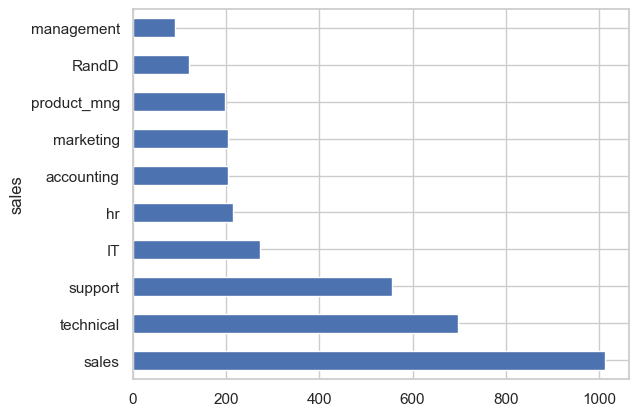

In [411]:
# Check imbalance first
left_df.sales.value_counts().plot.barh()

<Axes: ylabel='salary'>

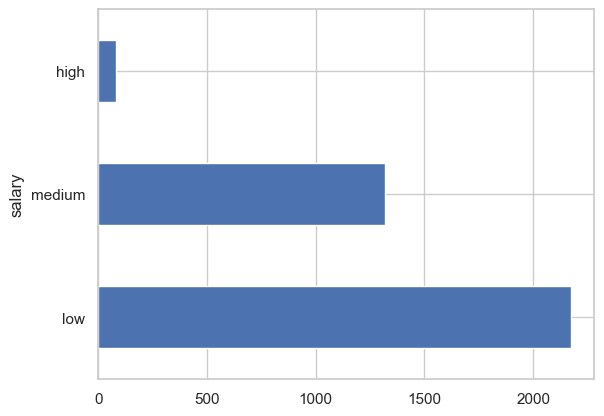

In [412]:
# Check imbalance
left_df.salary.value_counts().plot.barh()

In [413]:
sales_df = left_df[left_df.sales == "sales"]
technical_df = left_df[left_df.sales == "technical"]
support_df = left_df[left_df.sales == "support"]
IT_df = left_df[left_df.sales == "IT"]
hr_df = left_df[left_df.sales == "hr"]
accounting_df = left_df[left_df.sales == "accounting"]
marketing_df = left_df[left_df.sales == "marketing"]
product_mng_df = left_df[left_df.sales == "product_mng"]
RandD_mng_df = left_df[left_df.sales == "RandD"]
management_df = left_df[left_df.sales == "management"]

print(f'sales_df: {sales_df.shape}')
print(f'technical_df: {technical_df.shape}')
print(f'support_df: {support_df.shape}')
print(f'IT_df: {IT_df.shape}')
print(f'hr_df: {hr_df.shape}')
print(f'accounting_df: {accounting_df.shape}')
print(f'marketing_df: {marketing_df.shape}')
print(f'product_mng_df: {product_mng_df.shape}')
print(f'RandD_mng_df: {RandD_mng_df.shape}')
print(f'management_df: {management_df.shape}')

sales_df: (1014, 11)
technical_df: (697, 11)
support_df: (555, 11)
IT_df: (273, 11)
hr_df: (215, 11)
accounting_df: (204, 11)
marketing_df: (203, 11)
product_mng_df: (198, 11)
RandD_mng_df: (121, 11)
management_df: (91, 11)


### Pre-process the data by converting categorical columns to numerical columns

In [444]:
# Separate features and target
X = df.drop('left', axis=1)
y = df['left']
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [445]:
# Separate categorical and numerical variables
cols = list(df.columns)
categorical_vars = cols[-2:] #['sales', 'salary']
numeric_vars = X.drop(columns=categorical_vars).columns

In [446]:
# Apply get_dummies to categorical variables
X_categorical = pd.get_dummies(X[categorical_vars], drop_first=True)
X_categorical.head()

,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,False,False,False,False,False,False,True,False,False,True,False
1,False,False,False,False,False,False,True,False,False,False,True
2,False,False,False,False,False,False,True,False,False,False,True
3,False,False,False,False,False,False,True,False,False,True,False
4,False,False,False,False,False,False,True,False,False,True,False


In [447]:
# Combine categorical and numeric variables
X_combined = pd.concat([X[numeric_vars], X_categorical], axis=1)

### Stratified split of the dataset to train and test 


In [448]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict

from sklearn.preprocessing import StandardScaler

In [449]:
# Stratified split of the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, stratify=y, random_state=123)

In [450]:
# Upsample the train dataset using SMOTE
smote = SMOTE(random_state=123)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check the distribution of the target variable after SMOTE
print("Distribution of target variable before SMOTE:")
print(y.value_counts())
print("\n")
print("Distribution of target variable after SMOTE:")
print(y_train_res.value_counts())

Distribution of target variable before SMOTE:
left
0    11428
1     3571
Name: count, dtype: int64


Distribution of target variable after SMOTE:
left
0    9142
1    9142
Name: count, dtype: int64


In [451]:
# Standardize the features
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

In [452]:
# Now you can use X_train_res_scaled and y_train_res for training machine learning models
print(f"Shape of training data after SMOTE: {X_train_res_scaled.shape}")
print(f"Shape of testing data: {X_test_scaled.shape}")

Shape of training data after SMOTE: (18284, 18)
Shape of testing data: (3000, 18)


## Performing 5. 5-fold cross-validation model training and evaluate performance

### Train a Logistic Regression model and apply 5-fold cross-validation

In [453]:
# Initialize a Logistic Regression model and apply 5-fold cross-validation
log_reg = LogisticRegression(max_iter=10000, random_state=123)
y_train_pred = cross_val_predict(log_reg, X_train_res_scaled, y_train_res, cv=5)

Classification Report for Training Data with 5-Fold Cross-Validation:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      9142
           1       0.78      0.82      0.80      9142

    accuracy                           0.80     18284
   macro avg       0.80      0.80      0.80     18284
weighted avg       0.80      0.80      0.80     18284

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      2286
           1       0.51      0.74      0.60       714

    accuracy                           0.77      3000
   macro avg       0.71      0.76      0.72      3000
weighted avg       0.81      0.77      0.78      3000



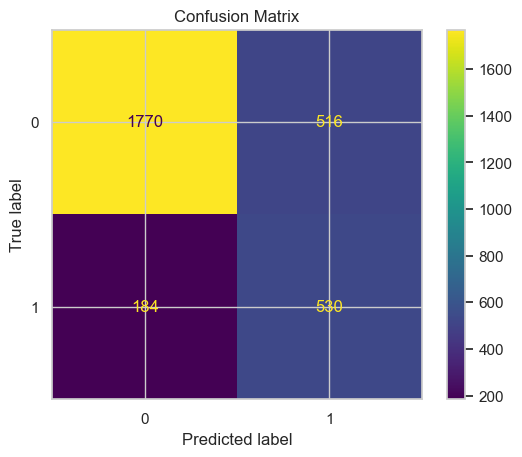

In [456]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot the classification report
print("Classification Report for Training Data with 5-Fold Cross-Validation:")
print(classification_report(y_train_res, y_train_pred))

# Fit the model on the whole training data
log_reg.fit(X_train_res_scaled, y_train_res)

# Predict on the test data
y_test_pred = log_reg.predict(X_test_scaled)

# Print the classification report for test data
print("Classification Report for Test Data:")
print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred,  labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=log_reg.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [458]:
# Plot confusion matrix using ConfusionMatrixDisplay.from_estimator
# cm_display = ConfusionMatrixDisplay.from_estimator(log_reg, X_test_scaled, y_test)
# cm_display.ax_.set_title('Confusion Matrix')
# plt.show()